<h4>Assignment Dataset : Computer Hardware Dataset</h4>

<h3>Imports</h3>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import requests
from sklearn.model_selection import train_test_split
from itertools import chain
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

<h3>Download dataset into local environment</h3>

In [24]:
download_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
target_csv_path = "machine.data"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


<h1> Part 1- Data Visualization and Exploration </h1>

<h3>Reading Dataset</h3>

In [25]:
dataset = pd.read_table(target_csv_path,delimiter = ',' , names=['vendorName','modelName','myct','mmin','mmax','cach','chmin','chmax','prp','erp']) 
type(dataset)

pandas.core.frame.DataFrame

<h3>Printing top 2 rows for sanity</h3>

In [26]:
dataset.head(2)

vendorName modelName  myct  mmin   mmax  cach  chmin  chmax  prp  erp
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253

<h3>Checking dimensionality of dataset</h3>

In [27]:
print("Dimension of dataset is",dataset.shape)
print("\n\nMore information about data is following :\n")
print(dataset.info())

Dimension of dataset is (209, 10)


More information about data is following :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vendorName  209 non-null    object
 1   modelName   209 non-null    object
 2   myct        209 non-null    int64 
 3   mmin        209 non-null    int64 
 4   mmax        209 non-null    int64 
 5   cach        209 non-null    int64 
 6   chmin       209 non-null    int64 
 7   chmax       209 non-null    int64 
 8   prp         209 non-null    int64 
 9   erp         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None


<b>From the above insights, it is evident that 
<ol>
    <li>there is no entry in dataset with null value for any column.</li>
    <li>There are total 10 columns in the dataset and 209 test data </li>
    <li> Vendor name and modelName are non predictive attributes</li>
    <li> myct, mmin, mmax,cach,chmin and chmax are predictive attributes </li>
    <li> prp is goal attribute </li>
    <li>erp is estimates by other developers using linear regression, therefore we can remove this column from our dataset</li>
    </ol>
    </b>
    
    

<h3>Dropping column erp</h3>

In [28]:
dataset = dataset.drop(['erp'],axis=1)

<h3>Insights of data</h3>

In [29]:
print(dataset.describe())
print("\n\nInsight on vendor name and model name data: \n")


              myct          mmin          mmax        cach       chmin  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            chmax          prp  
count  209.000000   209.000000  
mean    18.267943   105.622010  
std     25.997318   160.830733  
min      0.000000     6.000000  
25%      5.000000    27.000000  
50%      8.000000    50.000000  
75%     24.000000   113.000000  
max    176.000000  1150.000000  


Insight on vendor name and model n

<h3>checking for class imbalance</h3>


In [30]:
print(dataset.describe(include=object))
print("Following are the number of unique vendors: ", dataset["vendorName"].nunique())
print("Following are the frequency of data by vendorName: \n",dataset["vendorName"].value_counts())

       vendorName modelName
count         209       209
unique         30       209
top           ibm   1100/84
freq           32         1
Following are the number of unique vendors:  30
Following are the frequency of data by vendorName: 
 ibm             32
nas             19
sperry          13
ncr             13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
dg               7
hp               7
harris           7
magnuson         6
ipl              6
dec              6
c.r.d            6
prime            5
cambex           5
formation        5
perkin-elmer     3
nixdorf          3
gould            3
bti              2
wang             2
apollo           2
basf             2
microdata        1
sratus           1
adviser          1
four-phase       1
Name: vendorName, dtype: int64


<b>From the above insight, we get to know 
<ol>
    <li>Mean, standard deviation, min, max, and 25% , 50% ,75% quartiles of columns </li>
    <li>There 30 different unique vendors and all entries in our dataset are for unique modelNames </li>
    <li>IBM sells largest number of unique models i.e. 32 </li>
    <li>There is no class imbalance noticed, because, eventhough, number of records for IBM as vendor is high but model names are unique and no model is repeated in dataset. This only suggests that IBM provide highest variety of computer hardware and doesn't make our dataset class imbalance</li>
    </ol></b>

<h3>Checking for correlation</h3>

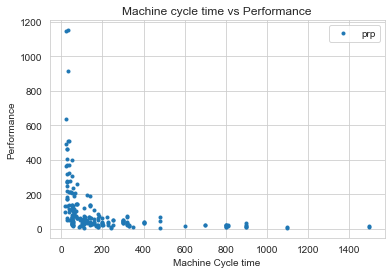

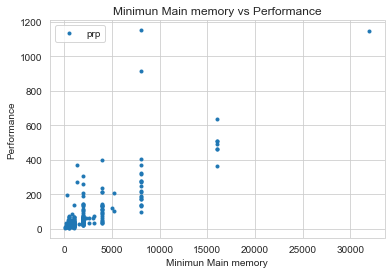

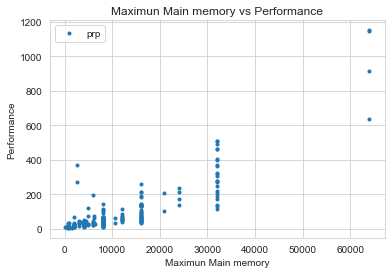

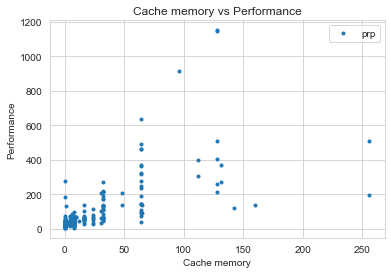

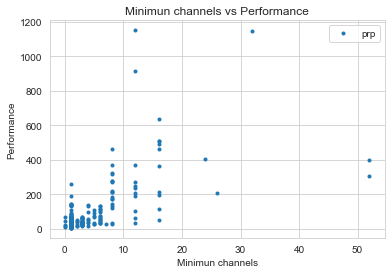

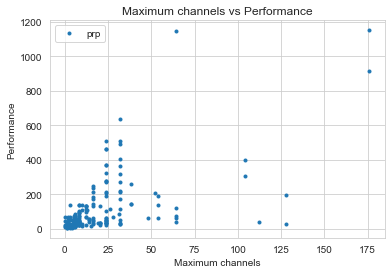

<AxesSubplot:>

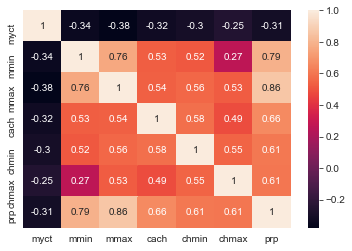

In [31]:

dataset.plot(x='myct',y='prp',style='.')
plt.title("Machine cycle time vs Performance")
plt.xlabel("Machine Cycle time")
plt.ylabel("Performance")
plt.show()
dataset.plot(x='mmin',y='prp',style='.')
plt.title("Minimun Main memory vs Performance")
plt.xlabel("Minimun Main memory")
plt.ylabel("Performance")
plt.show()
dataset.plot(x='mmax',y='prp',style='.')
plt.title("Maximun Main memory vs Performance")
plt.xlabel("Maximun Main memory")
plt.ylabel("Performance")
plt.show()
dataset.plot(x='cach',y='prp',style='.')
plt.title("Cache memory vs Performance")
plt.xlabel("Cache memory")
plt.ylabel("Performance")
plt.show()
dataset.plot(x='chmin',y='prp',style='.')
plt.title("Minimun channels vs Performance")
plt.xlabel("Minimun channels")
plt.ylabel("Performance")
plt.show()
dataset.plot(x='chmax',y='prp',style='.')
plt.title("Maximum channels vs Performance")
plt.xlabel("Maximum channels")
plt.ylabel("Performance")
plt.show()
sns.heatmap(dataset.corr(),annot=True)

<b>For the above data insights, it is evident that
    <ol>
        <li>mmin, mmax,cach,chmin,chmax have positive correlation with performance i.e. if these attributes increase in computer hardware, performance of computer looks to be increasing</li>
        <li>myct(Machine cycle time) have negative correlation with performance i.e. Performance is increasing with reduction in cycle time</li>
        <li> Extreme Values/outliers in data are also evident from the scatter plot</li>
    </ol>
    </b>

<h1>Part 2- Data Pre-processing and cleaning</h1>

<h3>Checking for empty or na values</h3>

In [32]:

dataset = dataset.replace(' ', np.nan)                   # to get rid of empty values
nan_values = dataset[dataset.isna().any(axis=1)]         # to get all rows with Na

nan_values 

Empty DataFrame
Columns: [vendorName, modelName, myct, mmin, mmax, cach, chmin, chmax, prp]
Index: []

No empty and NA value found

<h3>Checking for skewness in data</h3>

In [33]:
dataset.skew().sort_values(ascending=False)

chmin    4.027333
prp      3.892814
chmax    3.595905
mmin     3.515933
cach     2.824777
myct     2.544153
mmax     2.140663
dtype: float64

<b>Data is right skewed, therefore we have to standardize/normalize data and remove outliers(extreme values) because it Degrades the model’s ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values</b>

<h3>Standarizing data and checking outlier in it</h3>

Standardize Predictive attributes: 


myct      mmin      mmax      cach     chmin     chmax
0 -0.303586 -0.675026 -0.495462  5.694208  1.661989  4.231033
1 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479
2 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479
3 -0.673330  1.326291  1.727049  0.167629  0.485509  0.529479
4 -0.673330  1.326291  0.359350  0.167629  0.485509 -0.087447

Target attributes: 


prp
0  198
1  269
2  220
3  172
4  132

<AxesSubplot:>

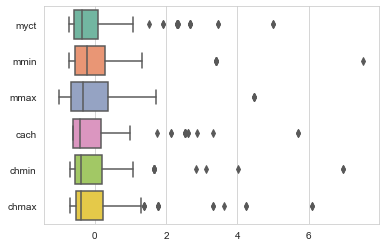

In [34]:
#Standarizing data
data_cols = ['myct','mmin','mmax','cach','chmin','chmax']
target_col = ['prp']
standardize_ds = dataset
standardize_ds = standardize_ds.drop(['vendorName'],axis=1)
standardize_ds = standardize_ds.drop(['modelName'],axis=1)
standardize_target_ds= standardize_ds[target_col]
cols = standardize_ds.columns 
d = preprocessing.scale(standardize_ds[data_cols])
standardize_data_ds = pd.DataFrame(d, columns=data_cols)
print("Standardize Predictive attributes: ")
display(standardize_data_ds.head())
print("Target attributes: ")
display(standardize_target_ds.head())
#checking for outliers
sns.set_style("whitegrid")
display(sns.boxplot(data=standardize_data_ds, orient="h", palette="Set2"))


<h3>Removing outlier in standardize data</h3>

Updated skew of standardize dataset is :
 chmin    1.280418
chmax    1.218062
cach     0.869105
mmax     0.725395
myct     0.492434
mmin     0.484085
dtype: float64
Sum of skewness of Standardize data:  5.069499335625002
Description of standardize dataset is :


myct       mmin       mmax       cach      chmin      chmax
count  85.000000  85.000000  85.000000  85.000000  85.000000  85.000000
mean   -0.099049  -0.451763  -0.568843  -0.504036  -0.383010  -0.363249
std     0.389160   0.178989   0.251392   0.131844   0.226491   0.264038
min    -0.688735  -0.724645  -1.002879  -0.621882  -0.543911  -0.665815
25%    -0.380616  -0.608867  -0.751906  -0.621882  -0.543911  -0.550141
50%    -0.168784  -0.482751  -0.666425  -0.523193  -0.543911  -0.473026
75%     0.177851  -0.224316  -0.324500  -0.424504  -0.249791  -0.241678
max     0.755575   0.059962   0.017425  -0.227126   0.191389   0.221016

Bloxplot of standardize dataset is : 


<AxesSubplot:>

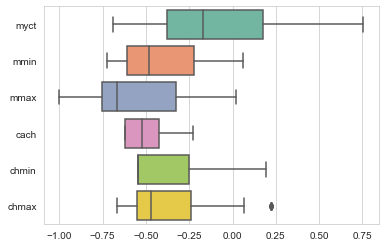

In [35]:
skew = 0
while np.sum(standardize_data_ds.skew()) != skew :
    skew =np.sum(standardize_data_ds.skew())
    Q1 = standardize_data_ds[data_cols].quantile(0.25)
    Q3 = standardize_data_ds[data_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers=~((standardize_data_ds[data_cols] < (Q1 - 1.75 * IQR)) |(standardize_data_ds[data_cols] > (Q3 + 1.75 * IQR))).any(axis=1)
    standardize_data_ds = standardize_data_ds[outliers]
    standardize_target_ds = standardize_target_ds[outliers]
print("Updated skew of standardize dataset is :\n" , standardize_data_ds.skew().sort_values(ascending=False))
print("Sum of skewness of Standardize data: ",np.sum(skew))
print("Description of standardize dataset is :")
display(standardize_data_ds.describe())
print("Bloxplot of standardize dataset is : ")
display(sns.boxplot(data=standardize_data_ds, orient="h", palette="Set2"))


<h3>#Removing outlier in original data</h3>

Updated skew of dataset is :
 chmin    1.280418
chmax    1.218062
cach     0.869105
mmax     0.725395
myct     0.492434
mmin     0.484085
dtype: float64
Sum of skewness of data:  5.069499335624996
Description of dataset is :


myct         mmin          mmax       cach      chmin      chmax
count   85.000000    85.000000     85.000000  85.000000  85.000000  85.000000
mean   178.105882  1119.905882   5141.552941   4.776471   2.094118   8.847059
std    101.041366   692.589269   2940.907608   5.343836   1.540126   6.847846
min     25.000000    64.000000     64.000000   0.000000   1.000000   1.000000
25%    105.000000   512.000000   3000.000000   0.000000   1.000000   4.000000
50%    160.000000  1000.000000   4000.000000   4.000000   1.000000   6.000000
75%    250.000000  2000.000000   8000.000000   8.000000   3.000000  12.000000
max    400.000000  3100.000000  12000.000000  16.000000   6.000000  24.000000

Bloxplot of dataset is : 


<AxesSubplot:>

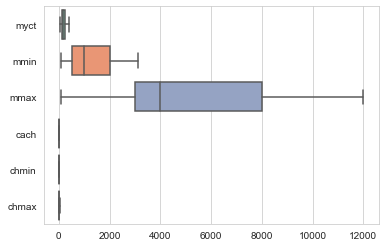

In [36]:
ds = dataset
ds = ds.drop(['vendorName'],axis=1)
ds = ds.drop(['modelName'],axis=1)
target_ds= ds[target_col]
data_ds=ds[data_cols]
skew = 0
while np.sum(data_ds.skew()) != skew :
    skew =np.sum(data_ds.skew())
    Q1 = data_ds[data_cols].quantile(0.25)
    Q3 = data_ds[data_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers=~((data_ds[data_cols] < (Q1 - 1.75 * IQR)) |(data_ds[data_cols] > (Q3 + 1.75 * IQR))).any(axis=1)
    data_ds = data_ds[outliers]
    target_ds = target_ds[outliers]
print("Updated skew of dataset is :\n" , data_ds.skew().sort_values(ascending=False))
print("Sum of skewness of data: ",np.sum(skew))
print("Description of dataset is :")
display(data_ds.describe())
print("Bloxplot of dataset is : ")
display(sns.boxplot(data=data_ds, orient="h", palette="Set2"))


<h3> #Normalizing Data and checking outliers in it </h3>

Normalized Predictive attributes: 


myct      mmin      mmax      cach     chmin     chmax
0  0.026195  0.003677  0.024982  0.371004  0.133902  0.279102
1  0.006077  0.114893  0.133235  0.046375  0.066951  0.069776
2  0.006077  0.114893  0.133235  0.046375  0.066951  0.069776
3  0.006077  0.114893  0.133235  0.046375  0.066951  0.069776
4  0.006077  0.114893  0.066618  0.046375  0.066951  0.034888

Target  attributes: 


prp
0  198
1  269
2  220
3  172
4  132

<AxesSubplot:>

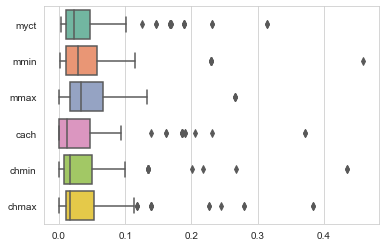

In [37]:
#Normalizing Data
normalised_ds = dataset
normalised_ds = normalised_ds.drop(['vendorName'],axis=1)
normalised_ds = normalised_ds.drop(['modelName'],axis=1)
normalised_target_ds= normalised_ds[target_col]
cols = normalised_ds.columns 
d = preprocessing.normalize(normalised_ds[data_cols],axis=0)
normalised_data_ds = pd.DataFrame(d, columns=data_cols)
print("Normalized Predictive attributes: ")
display(normalised_data_ds.head())
print("Target  attributes: ")
display(normalised_target_ds.head())
#checking for outliers
sns.set_style("whitegrid")
display(sns.boxplot(data=normalised_data_ds, orient="h", palette="Set2"))

<h3>Removing outlier in Normalizing data</h3>

Updated skew of nomalized dataset is :
 cach     1.079434
chmax    0.136328
mmin     0.119857
chmin    0.000000
myct    -0.112857
mmax    -0.174866
dtype: float64
Sum of skewness of nomalized data:  1.0478956115517666
Description of nomalized dataset is :


myct       mmin       mmax       cach         chmin      chmax
count  25.000000  25.000000  25.000000  25.000000  2.500000e+01  25.000000
mean    0.047318   0.008883   0.012918   0.003130  8.368860e-03   0.009158
std     0.022252   0.004524   0.005986   0.004421  5.311484e-18   0.003210
min     0.010478   0.000919   0.000266   0.000000  8.368860e-03   0.004361
25%     0.037720   0.007181   0.008327   0.000000  8.368860e-03   0.006541
50%     0.042540   0.007353   0.014573   0.000000  8.368860e-03   0.008722
75%     0.067058   0.014362   0.016654   0.005797  8.368860e-03   0.010902
max     0.083822   0.014362   0.024982   0.011594  8.368860e-03   0.015263

Bloxplot of nomalized dataset is : 


<AxesSubplot:>

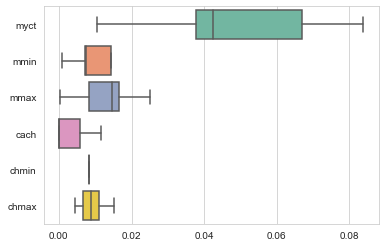

In [38]:
skew = 0
while np.sum(normalised_data_ds.skew()) != skew :
    skew =np.sum(normalised_data_ds.skew())
    Q1 = normalised_data_ds[data_cols].quantile(0.25)
    Q3 = normalised_data_ds[data_cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier=~((normalised_data_ds[data_cols] < (Q1 - 1.5 * IQR)) |(normalised_data_ds[data_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    normalised_data_ds = normalised_data_ds[outlier]
    normalised_target_ds=normalised_target_ds[outlier]
print("Updated skew of nomalized dataset is :\n" , normalised_data_ds.skew().sort_values(ascending=False))
print("Sum of skewness of nomalized data: ",np.sum(skew))
print("Description of nomalized dataset is :")
display(normalised_data_ds.describe())
print("Bloxplot of nomalized dataset is : ")
display(sns.boxplot(data=normalised_data_ds, orient="h", palette="Set2"))


<b>For data preprocessing and cleaning, we have done following tasks
    <ol>
        <li>Checked for empty or NA value</li>
        <li>Checked skewness of the data</li>
        <li>Standardize the dataset</li>
        <li>normalized the datset</li>
        <li>Removed outliers using boxplot from standardize, normalized and normal dataset and compare results</li>
    </ol>
    After the analyses we noticed that skewness of normalized data is less than skewness in standardize and original data after removing outliers. But the count of dataset left for normalized dataset is only 25 on the other side, skewness result for original data and standarized data are identical after removing outliers. Therefore, we will be using original dataset for further process. 
    </b>

<h1> Model Building </h1>

<h3>Splitting Dataset</h3>

In [39]:
#spliting dataset in 80:20 ration
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(data_ds,target_ds,test_size=0.2,random_state=0)
#spliting dataset in 90:10 ration
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(data_ds,target_ds,test_size=0.1,random_state=0)

<h3>Creating Linear Regression Model</h3>

In [40]:
#Creating regresssion model for just fit right model for training set 1 
fitRegression1 = LinearRegression(fit_intercept = True)
fitRegression1.fit(X_train_1,Y_train_1)
print("Linear regression coefficient for fit right model for 1 training set:  ",fitRegression1.coef_)
print("Linear regression intercept for fit right model for 1 training set:  ",fitRegression1.intercept_)

#Creating regresssion model for just fit right model for training set 2
fitRegression2 = LinearRegression(fit_intercept = True)
fitRegression2.fit(X_train_2,Y_train_2)
print("Linear regression coefficient for fit right model for 2 training set:  ",fitRegression2.coef_)
print("Linear regression intercept for fit right model for 2 training set:  ",fitRegression2.intercept_)


Linear regression coefficient for fit right model for 1 training set:   [[0.03647328 0.00197943 0.0036319  0.82671436 0.81653894 0.37243512]]
Linear regression intercept for fit right model for 1 training set:   [-0.6220352]
Linear regression coefficient for fit right model for 2 training set:   [[ 0.04139948  0.00250926  0.00319075  1.18279001  1.93143169 -0.03145513]]
Linear regression intercept for fit right model for 2 training set:   [0.69979295]


<h3>#Plotting graph between expected value and predicted value for training set 1 </h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prp'>

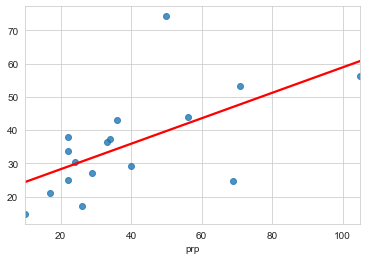

In [41]:
y_pred_1 = fitRegression1.predict(X_test_1)
sns.regplot(Y_test_1, y_pred_1, line_kws={'color':'red'}, ci=None)

<h3>#Plotting graph between expected value and predicted value for training set 2</h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prp'>

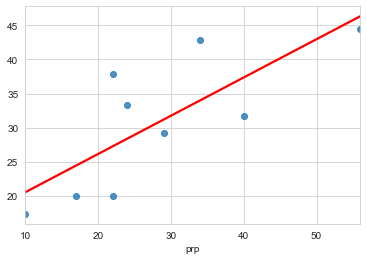

In [42]:
y_pred_2 = fitRegression2.predict(X_test_2)
sns.regplot(Y_test_2, y_pred_2, line_kws={'color':'red'}, ci=None)


<h3>K-fold cross validation</h3>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:
<ol>
<li>Shuffle the dataset randomly.</li>
<li>Split the dataset into k groups</li>
<li>For each unique group:</li><ol>
<li>Take the group as a hold out or test data set</li>
<li>Take the remaining groups as a training data set</li>
<li>Fit a model on the training set and evaluate it on the test set</li>
<li>Retain the evaluation score and discard the model</li>
<li>Summarize the skill of the model using the sample of model evaluation scores</li></ol></ol>
Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds.

It is also important that any preparation of the data prior to fitting the model occur on the CV-assigned training dataset within the loop rather than on the broader data set. This also applies to any tuning of hyperparameters. A failure to perform these operations within the loop may result in data leakage and an optimistic estimate of the model skill.

Despite the best efforts of statistical methodologists, users frequently invalidate their results by inadvertently peeking at the test data.

The results of a k-fold cross-validation run are often summarized with the mean of the model skill scores. It is also good practice to include a measure of the variance of the skill scores, such as the standard deviation or standard error.

<h1>Part 4 - Performance Evaluation </h1>

<h3>Performance analyses of training data 1</h3>

In [43]:


k=3
n=80
r2 = r2_score(Y_test_1,y_pred_1 )
mse = mean_squared_error(Y_test_1, y_pred_1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_1, y_pred_1)
adj_r2= 1- ((1-r2)*(n-1)/(n-k-1))
print("R Squared: ", r2)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("Adjusted R Squared: ", adj_r2)
res_1 = (Y_test_1-y_pred_1)
pred_y_table_1 = pd.DataFrame({"Actual Value":Y_test_1['prp'].tolist(),"Predicted Value":list(chain.from_iterable(y_pred_1)),"Difference":res_1['prp'].tolist()})
pred_y_table_1.describe()

R Squared:  0.3475765475958542
Mean Squared Error:  362.535232600629
Root Mean Squared Error:  19.04035799560053
Mean Absolute Error:  13.453277122505918
Adjusted R Squared:  0.32182299026411165


Actual Value  Predicted Value  Difference
count     17.000000        17.000000   17.000000
mean      39.176471        35.590616    3.585855
std       24.298239        15.258450   19.275157
min       10.000000        14.809017  -24.220945
25%       22.000000        24.919387   -6.429147
50%       33.000000        33.736936   -3.368859
75%       50.000000        43.161785   10.783675
max      105.000000        74.220945   48.875739

<h3>Performance analyses of training data 2</h3>

In [44]:
r2 = r2_score(Y_test_2,y_pred_2 )
mse = mean_squared_error(Y_test_2, y_pred_2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_2, y_pred_2)
adj_r2= 1- ((1-r2)*(n-1)/(n-k-1))
print("R Squared", r2)
print("MSE", mse)
print("RMSE", rmse)
print("MAE", mae)
print("adjusted R Squared", adj_r2)
res_2 = (Y_test_2-y_pred_2)
pred_y_table_2 = pd.DataFrame({"Actual Value":Y_test_2['prp'].tolist(),"Predicted Value":list(chain.from_iterable(y_pred_2)),"Difference":res_2['prp'].tolist()})
pred_y_table_2.describe()

R Squared 0.5444323096651582
MSE 75.80421395472837
RMSE 8.706561546025409
MAE 7.37205464421409
adjusted R Squared 0.5264493745203618


Actual Value  Predicted Value  Difference
count      9.000000         9.000000    9.000000
mean      28.222222        30.767308   -2.545086
std       13.681902        10.034369    8.831342
min       10.000000        17.360023  -15.833250
25%       22.000000        20.033143   -8.864098
50%       24.000000        31.751344   -3.033143
75%       34.000000        37.833250    1.992046
max       56.000000        44.519344   11.480656

<u><b>We noticed that 2nd training set showed least Mean Squared Error therefore 2nd model is better that 1st model</b></u>

<h3>Underfitting:</h3> A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data, i.e., it only performs well on training data but performs poorly on testing data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. 

In a nutshell, Underfitting refers to a model that can neither performs well on the training data nor generalize to new data. 

<h4>Reasons for Underfitting:</h4>
<ol>
<li>High bias and low variance </li>
<li>The size of the training dataset used is not enough.</li>
<li>The model is too simple.</li>
<li>Training data is not cleaned and also contains noise in it.</li>
    </ol>

<h3>Overfitting:</h3> A statistical model is said to be overfitted when the model does not make accurate predictions on testing data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. And when testing with test data results in High variance. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees. 

In a nutshell, Overfitting is a problem where the evaluation of machine learning algorithms on training data is different from unseen data.

<h4>Reasons for Overfitting are as follows:</h4>
<ol>
<li> High variance and low bias</li> 
<li>The model is too complex</li> 
<li>The size of the training data </li> 
</ol>

<h3>Just Fit </h3> Ideally, the case when the model makes the predictions with 0 error, is said to have a good fit on the data. This situation is achievable at a spot between overfitting and underfitting. In order to understand it, we will have to look at the performance of our model with the passage of time, while it is learning from the training dataset.

With the passage of time, our model will keep on learning, and thus the error for the model on the training and testing data will keep on decreasing. If it will learn for too long, the model will become more prone to overfitting due to the presence of noise and less useful details. Hence the performance of our model will decrease. In order to get a good fit, we will stop at a point just before where the error starts increasing. At this point, the model is said to have good skills in training datasets as well as our unseen testing dataset, like we see with our predictions from training set1 and training set 2  